<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW_4_Q2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODIFIED EXAMPLES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA

#NEW
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Housing Dataset

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# List of variables to map

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea']

housingNew=housing[num_vars]
housingNew.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
# Separate features and labels

varlist_X = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
varlist_Y = ['price']

**DR. Tahbkei's "SVR" Code Example**

K = 1
K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10
K = 11


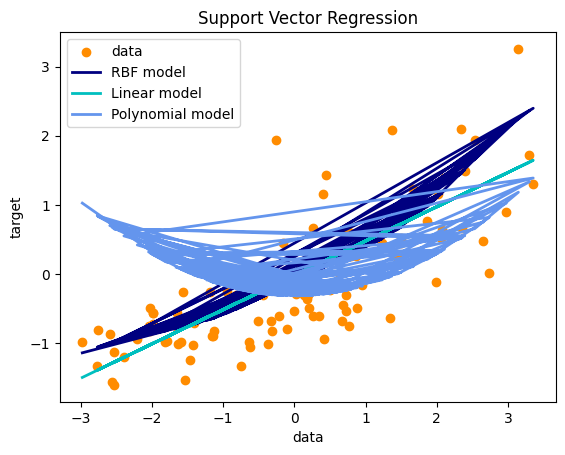

In [6]:
X = housingNew[varlist_X]
Y = housingNew[varlist_Y]

#Standardize
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Kernalization - Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

n=X.shape[1]
for i in range(n):
      print("K = "+ str(i+1))
      pca = PCA(n_components=i+1)
      principalComponents = pca.fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

      LIN_classifier = svr_lin
      POLY_classifier = svr_poly
      RBF_classifier = svr_rbf

      LIN_classifier.fit(X_train, y_train)
      POLY_classifier.fit(X_train, y_train)
      RBF_classifier.fit(X_train, y_train)

      LIN_Y_pred = LIN_classifier.predict(X_test)
      POLY_Y_pred = POLY_classifier.predict(X_test)
      RBF_Y_pred = RBF_classifier.predict(X_test)

y_lin = svr_lin.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])
y_poly = svr_poly.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])
y_rbf = svr_rbf.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])

# Look at the results
lw = 2
plt.scatter(X_test[:,0:1], y_test, color='darkorange', label='data')
plt.plot(X_test[:,0:1], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test[:,0:1], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test[:,0:1], y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()